Biosignalverarbeitung Praktikum 3 - Auswertung Daten Elisabeth Krepper (MVC, Weight, Fatigue)

1. Vorverarbeitung der EMG-Daten

In [1]:
#Bibliotheken importieren

%pip install matplotlib numpy scipy
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc
import Lab3Functions as lf3


Note: you may need to restart the kernel to use updated packages.


        emg      t
0      1482    119
1      1483    122
2      1483    124
3      1484    128
4      1483    130
...     ...    ...
27038  1486  67457
27039  1486  67459
27040  1486  67462
27041  1486  67464
27042  1486  67466

[27043 rows x 2 columns]


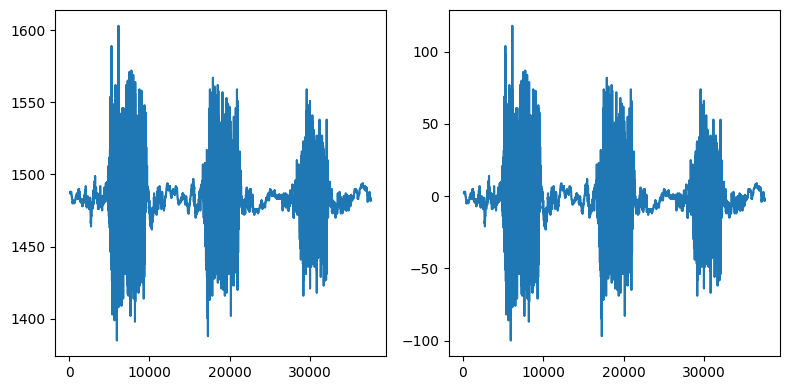

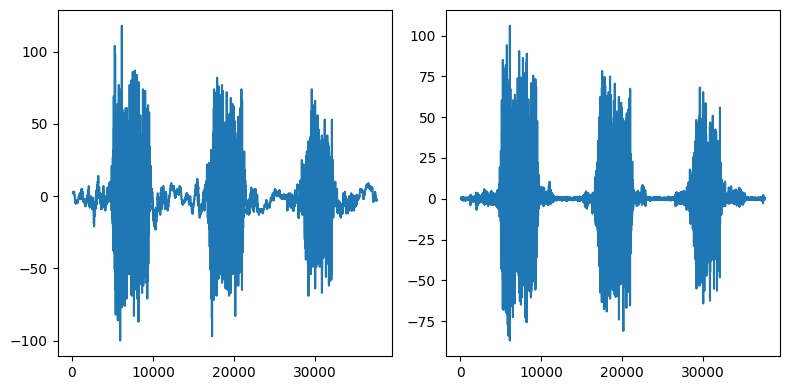

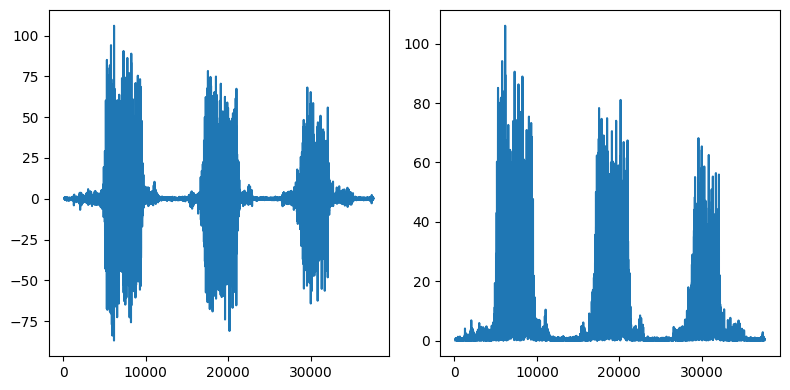

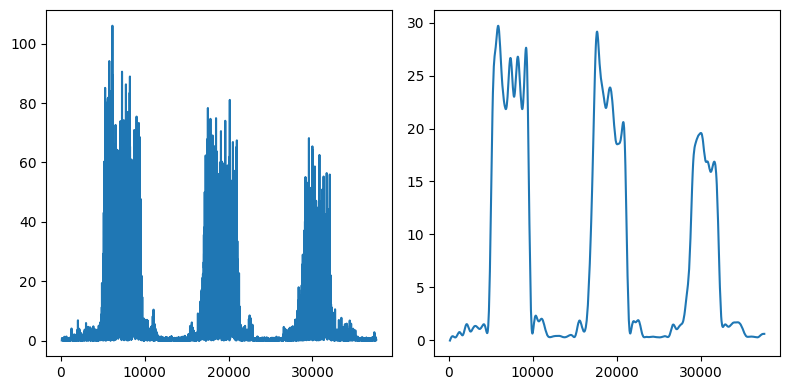

In [2]:
#Importieren der Daten
weights, mvc, fatigue = lf3.import_data('\t')

print(weights)

#Offset im emg Datensatz entfernen
mvc_offsetclean = mvc['emg'] - 1485
weights_offsetclean = weights['emg'] - 1480
fatigue_offsetclean = fatigue['emg'] - 1490

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(mvc['t'], mvc['emg'])
axes[1].plot(mvc['t'], mvc_offsetclean)
fig.tight_layout()

#Butterworth Filter (20 Hz bis 450 Hz) anwenden (nicht im lf3)
b, a = sc.butter(4, [20/500, 450/500], btype='bandpass')
mvc_emg_filtered = sc.filtfilt(b, a, mvc_offsetclean)
weights_emg_filtered = sc.filtfilt(b, a, weights_offsetclean)
fatigue_emg_filtered = sc.filtfilt(b, a, fatigue_offsetclean)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(mvc['t'], mvc_offsetclean)
axes[1].plot(mvc['t'], mvc_emg_filtered)
fig.tight_layout()

#Gleichrichten der Daten (nicht im lf3)
mvc_rectified = np.abs(mvc_emg_filtered)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(mvc['t'], mvc_emg_filtered)
axes[1].plot(mvc['t'], mvc_rectified)
fig.tight_layout()

#Einhüllende Bilden: Tiefpass Grenfrequenz 3 Hz (nicht im lf3)
b, a = sc.butter(4, 3/500, btype='lowpass')
mvc_envelope = sc.filtfilt(b, a, mvc_rectified)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(mvc['t'], mvc_rectified)
axes[1].plot(mvc['t'], mvc_envelope)
fig.tight_layout()



#ACHTUNG ZEIT NOCH NICHT IN SEKUNDEN
#Beschriftungen!

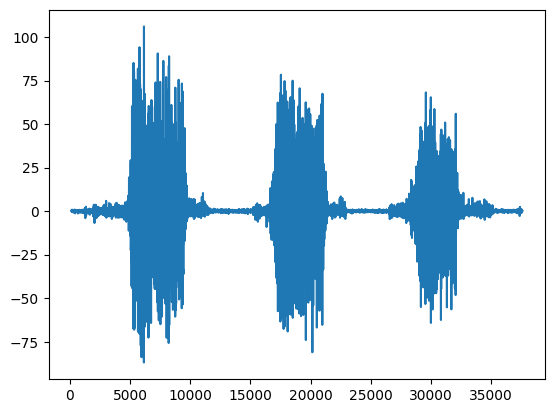

Click once to start zoom


c:\Users\elisa\Desktop\MCI\3_MGST_WS_2425(3)\Biosignalverarbeitung\Praktikum3\Tests_gesamt_Lisi\Lab3Functions.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.waitforbuttonpress()


In [ ]:
plt.plot(mvc['t'], mvc_emg_filtered)
plt.show()

plt.ion()

mvc_s, mvc_e, weights_s, weights_e, fatigue_s, fatigue_e = lf3.get_bursts(
    mvc_emg_filtered, weights_emg_filtered, fatigue_emg_filtered
)
